In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(X_train , y_train),(X_test , y_test ) =  keras.datasets.mnist.load_data()

In [4]:
len(X_train),len(X_test)

(60000, 10000)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

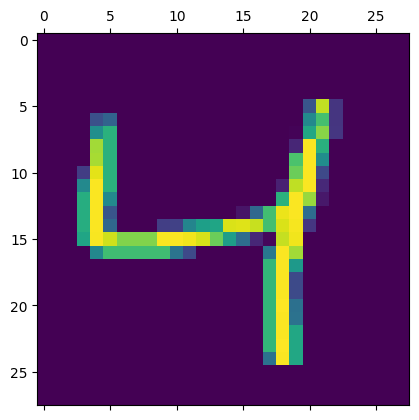

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4691 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2829 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9258


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2648 - accuracy: 0.9265


[0.26475027203559875, 0.9265000224113464]

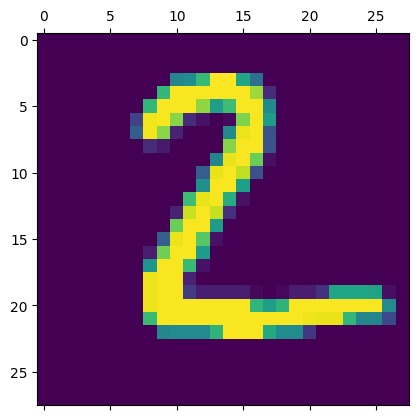

In [14]:
plt.matshow(X_test[1])

In [15]:
y_predict = model.predict(X_test_flattened)
y_predict[1]

313/313 [==============================] - 1s 2ms/step


array([4.3584791e-01, 3.7522684e-03, 9.9970180e-01, 4.9987200e-01,
       8.5057139e-10, 8.4549403e-01, 8.9838201e-01, 1.0170714e-12,
       1.7892045e-01, 3.7986996e-09], dtype=float32)

In [16]:
np.argmax(y_predict[1])

2

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(y_test, y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    2,    0,    5,    6,    2,    3,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,    7,  932,   16,    6,    4,   10,   10,   38,    5],
       [   1,    0,   21,  929,    0,   19,    2,   10,   19,    9],
       [   1,    1,    5,    2,  909,    0,   10,    3,    9,   42],
       [   7,    3,    4,   40,    7,  777,   13,    4,   30,    7],
       [  11,    3,    8,    1,    7,   10,  915,    2,    1,    0],
       [   1,    8,   22,    9,    8,    1,    0,  933,    2,   44],
       [   5,    8,    7,   27,    9,   28,   10,    7,  863,   10],
       [  11,    7,    1,   11,   22,    7,    0,   12,    4,  934]])>

Text(95.72222222222221, 0.5, 'Truth')

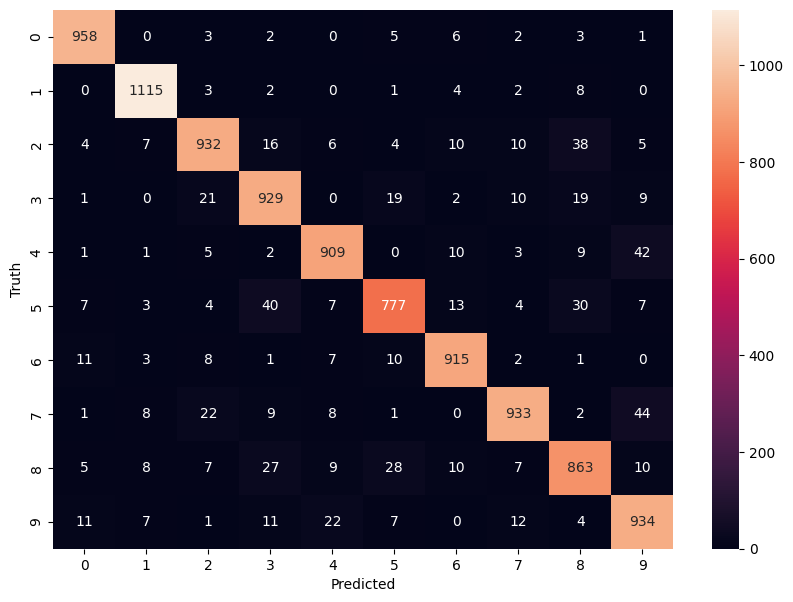

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2707 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1252 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0875 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9838


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9781


[0.07451222836971283, 0.9781000018119812]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

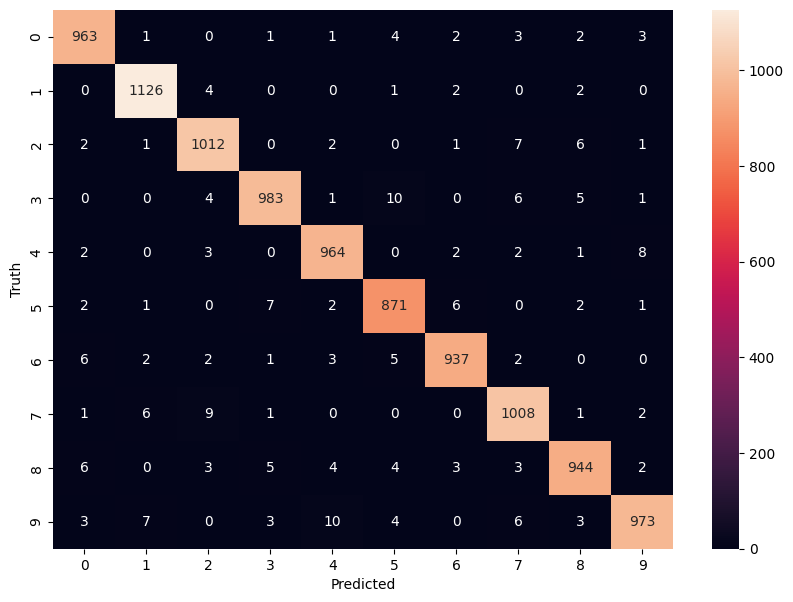

In [23]:
y_predict = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(y_test, y_predict_labels)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1209 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0838 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0489 - accuracy: 0.9849
